<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Animal_Type         431 non-null    object 
 1   Breed               431 non-null    object 
 2   Age                 431 non-null    int64  
 3   Gender              431 non-null    object 
 4   Weight              431 non-null    float64
 5   Symptom_1           431 non-null    object 
 6   Symptom_2           431 non-null    object 
 7   Symptom_3           431 non-null    object 
 8   Symptom_4           431 non-null    object 
 9   Duration            431 non-null    object 
 10  Appetite_Loss       431 non-null    object 
 11  Vomiting            431 non-null    object 
 12  Diarrhea            431 non-null    object 
 13  Coughing            431 non-null    object 
 14  Labored_Breathing   431 non-null    object 
 15  Lameness            431 non-null    object 
 16  Skin_Les

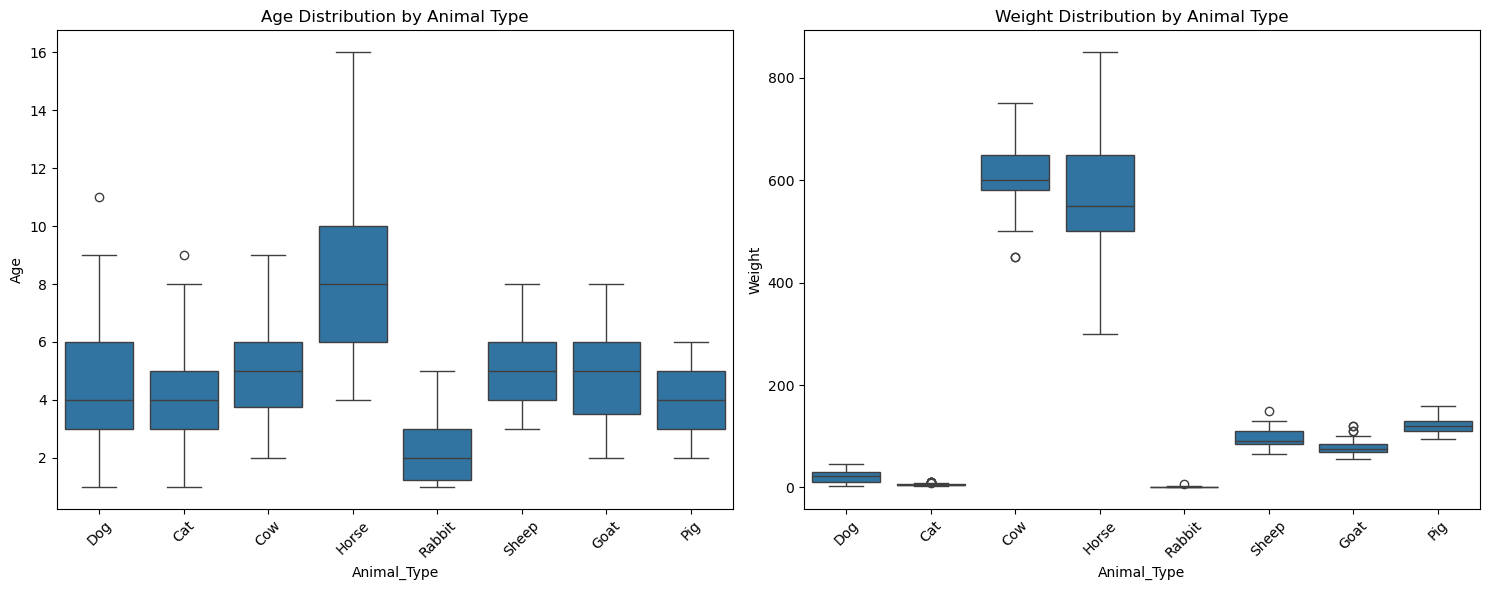

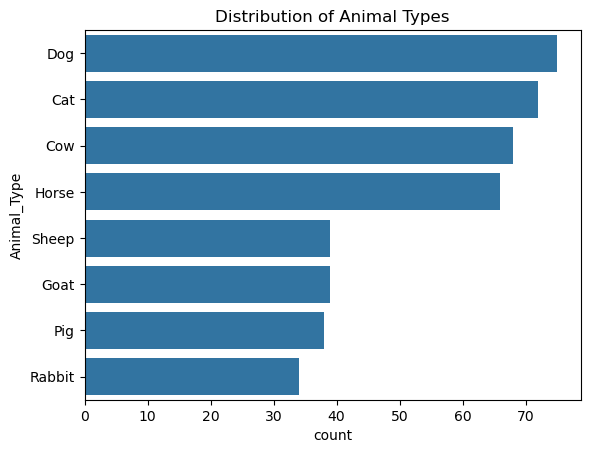

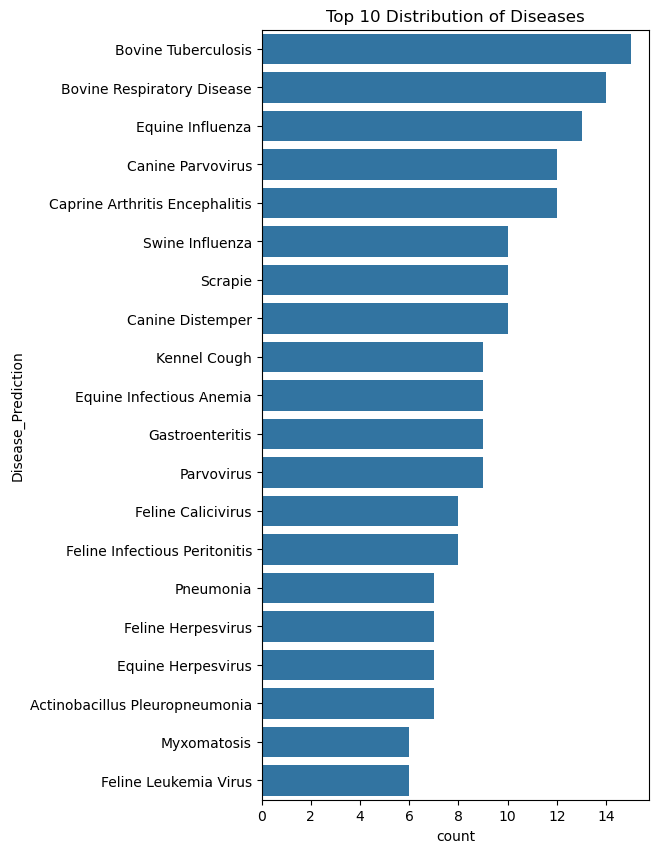

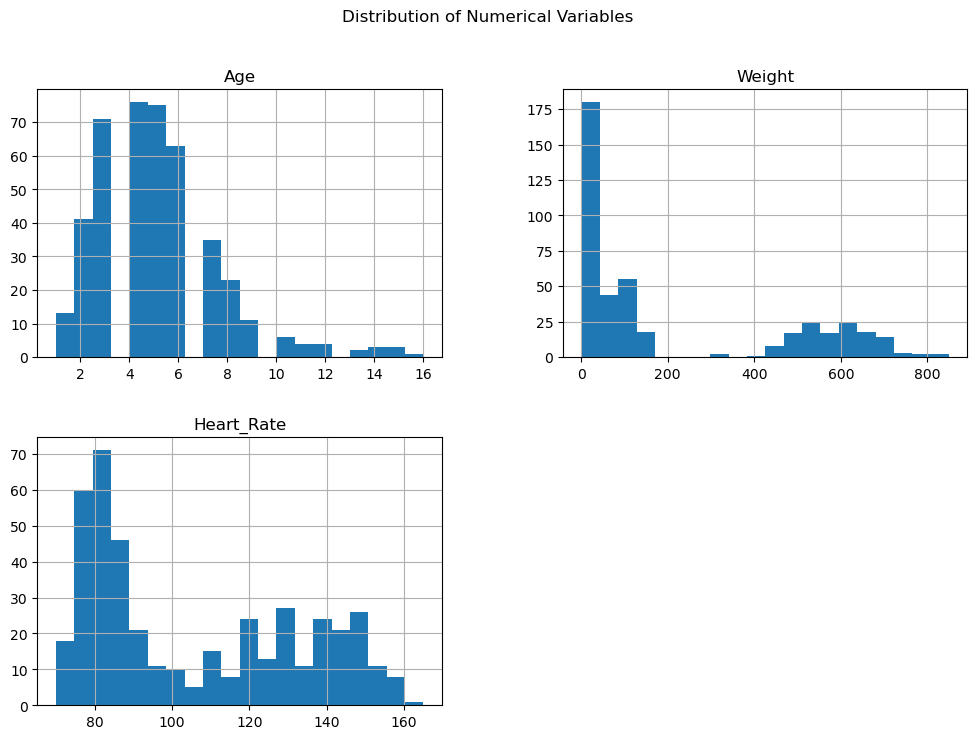

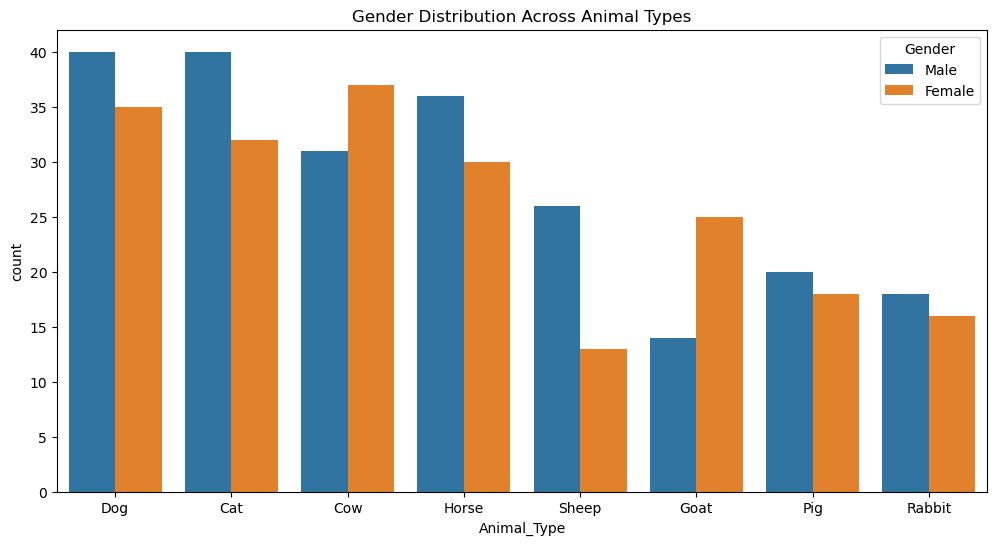

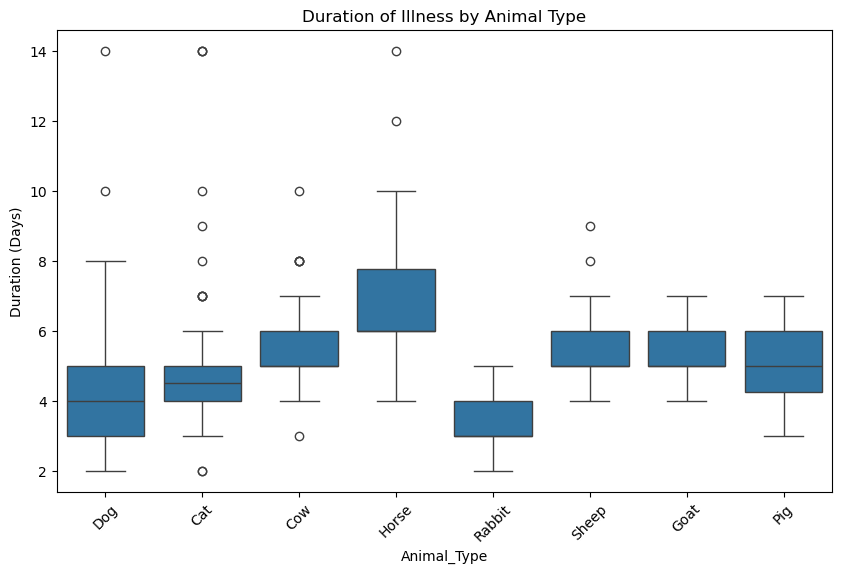

1.6.1
class dict:  {'Bovine Respiratory Disease': 0, 'Bovine Tuberculosis': 1, 'Canine Distemper': 2, 'Canine Parvovirus': 3, 'Caprine Arthritis Encephalitis': 4, 'Equine Infectious Anemia': 5, 'Equine Influenza': 6, 'Gastroenteritis': 7, 'Kennel Cough': 8, 'Other': 9, 'Parvovirus': 10, 'Scrapie': 11, 'Swine Influenza': 12}
Class Weights: {0: 2.4055944055944054, 1: 2.2051282051282053, 2: 3.3076923076923075, 3: 2.646153846153846, 4: 2.646153846153846, 5: 3.78021978021978, 6: 2.646153846153846, 7: 3.78021978021978, 8: 3.78021978021978, 9: 0.1107177341486965, 10: 3.78021978021978, 11: 3.3076923076923075, 12: 3.3076923076923075}
Train Encoded Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Test Encoded Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Stored 'X_train' (DataFrame)
Stored 'X_test' (DataFrame)
Stored 'y_train' (Series)
Stored 'y_test' (Series)
Removed -83 constant features.


/opt/anaconda3/envs/Animal_disease/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [22:08:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1738880277541/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/Animal_disease/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [22:08:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1738880277541/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/Animal_disease/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [22:08:24] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1738880277541/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/anaconda3/envs/Animal_disease/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [22:08:24] WARNING: /Us

Best RF params: {'n_estimators': 50, 'min_samples_split': 5, 'max_depth': 10, 'class_weight': 'balanced'}
Best XGB params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


In [7]:
%run ModelTraining.ipynb

=== Random Forest ===
Accuracy: 0.7126


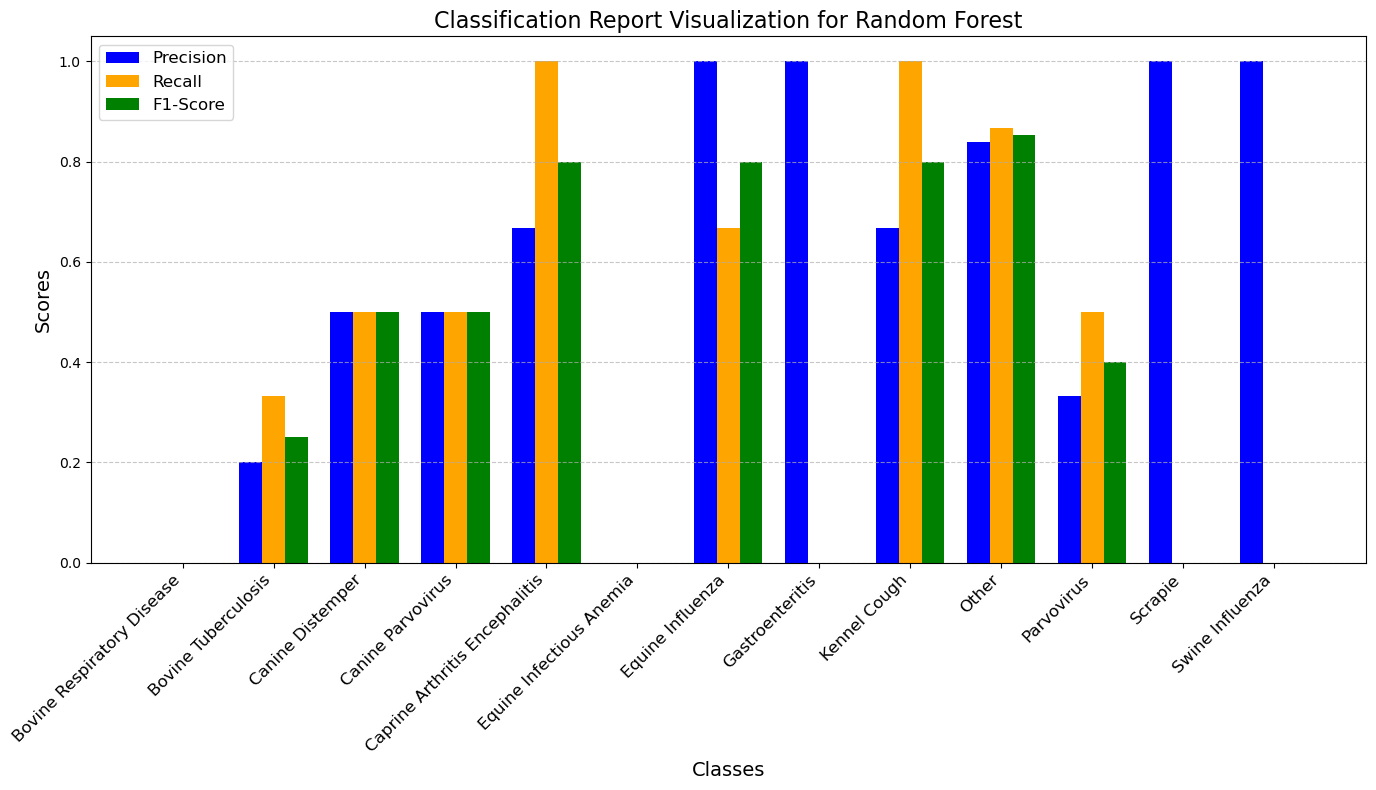

=== XGBoost ===
Accuracy: 0.7241


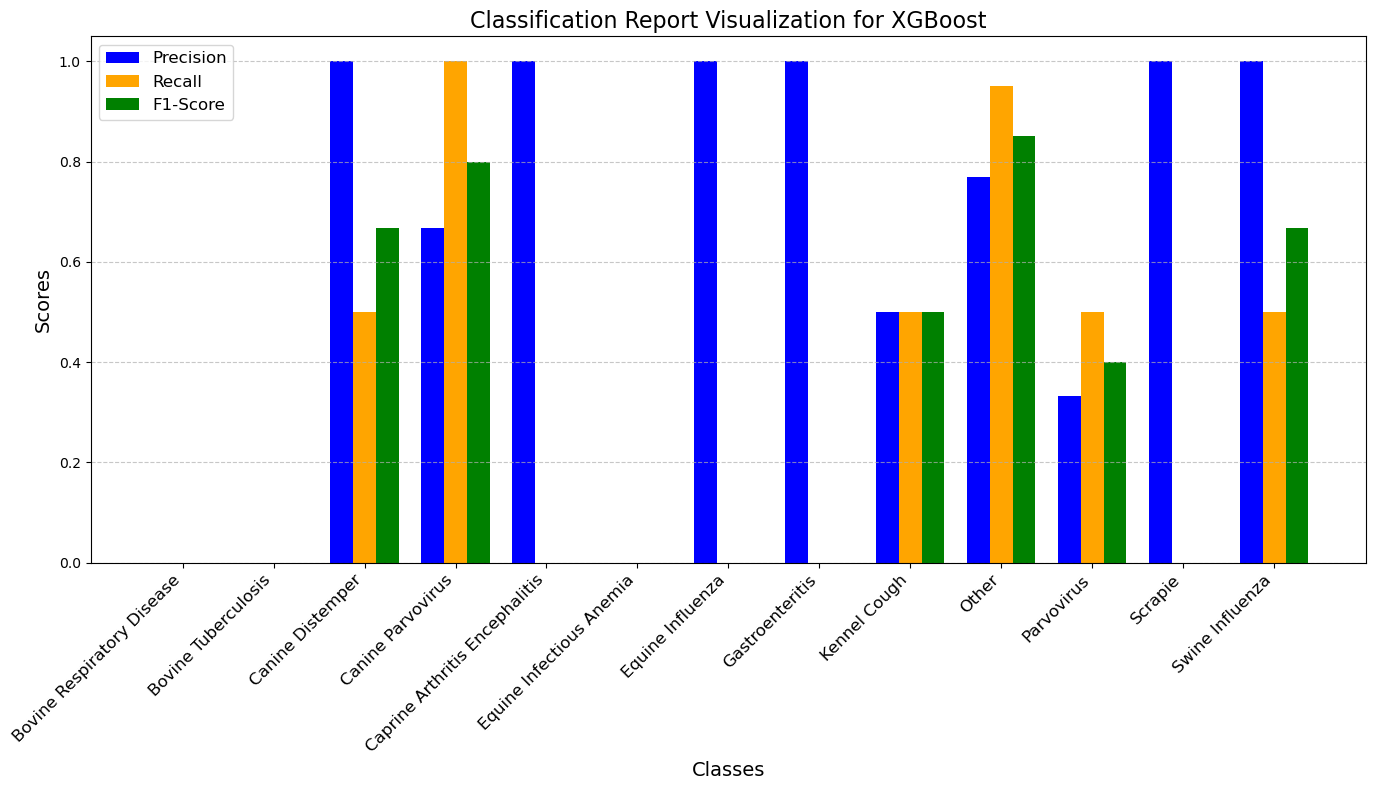

In [11]:
# Get best estimators
rf_best = rf_random_search.best_estimator_
xgb_best = xgb_random_search.best_estimator_


# Evaluate models
for model_name, model in [("Random Forest", rf_best), ("XGBoost", xgb_best)]:
    y_pred = model.predict(X_test_fs)
    accuracy = accuracy_score(y_test_encoded, y_pred)

    test_classes = np.unique(y_test_encoded)
    target_names = le.inverse_transform(test_classes)

    # Classification report
    report = classification_report(
        y_test_encoded,
        y_pred,
        labels=test_classes,
        target_names=target_names,
        zero_division=1
    )

    print(f"=== {model_name} ===")
    print(f"Accuracy: {accuracy:.4f}")
    # Generate classification report
    report_dict = classification_report(
        y_test_encoded,
        y_pred,
        labels=test_classes,
        target_names=target_names,
        zero_division=1,
        output_dict=True
    )

    # Visualize report
    categories = list(report_dict.keys())[:-3]
    precision = [report_dict[category]['precision'] for category in categories]
    recall = [report_dict[category]['recall'] for category in categories]
    f1_score = [report_dict[category]['f1-score'] for category in categories]

    # Plot categories
    x = np.arange(len(categories))
    bar_width = 0.25

    # Plot the bars
    fig, ax = plt.subplots(figsize=(14, 8))
    ax.bar(x - bar_width, precision, bar_width, label='Precision', color='blue')
    ax.bar(x, recall, bar_width, label='Recall', color='orange')
    ax.bar(x + bar_width, f1_score, bar_width, label='F1-Score', color='green')

    # Label the plot
    ax.set_xlabel('Classes', fontsize=14)
    ax.set_ylabel('Scores', fontsize=14)
    ax.set_title(f'Classification Report Visualization for {model_name}', fontsize=16)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, rotation=45, ha='right', fontsize=12)
    ax.legend(fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

